![title](yesbank_feature_banner.png)

# YES BANK DATATHON

## Machine Learning Challenge

### Data Description 
The dataset as provided is a summary of data available about various mutual funds and it is our task to identify which would be the most profitable funds as per basis point spread of the fund. The dataset contains details of all kinds of rated funds under a title but for this challenge we are only clustering the aaa rated funds. Please read the description below to understand the significance of each variable:

Isn’t it a difficult job looking at a seed and trying to guess which one would grow up to be a tree of fruits and which one would die at the hint of hardships. Well the same is not always true for choosing your funds, owing to statistical relationships the related data pose. This document is to help one cut through the jargons related to fund analysis so that it may help you choose the significant variables to work with in order to predict our target variable into clusters. Please study the following terms which would enhance your understanding of funds so that you may find relevant statistical relationships.

### Objective of the problem 
The objective of the problem is to predict which basis point spread zone of aaa rated mutual fund might fall into considering an investment from 2010 to 2017. **The idea is to find funds with maximum yield potential and to figure out how bps varies in correlation to other fund variables.** 
The Basis point spread range is divided into 3 clusters which are: 
* 1) Less than 50 
* 2) 50 to less than 100 
* 3) 100 


The sample submission file contains the the serial number wise sorted data as per clusters, going from lower values to higher values, as in the order above. Please note that the sample submission is only for demonstration of how a the correct prediction file should be uploaded. 
Please note that the training data is only for creating your data model and all predictions are to be made as per serial numbers on the test file.

 * **Please predict the values of bonds_aaa variable for the test dataset and sort it into a list as per clusters. The sorted file which is to be uploaded be a continuous file upto all serial numbers in the test data. **
 * **Each serial number has a one to one mapping with the the bonds_aaa variable so the mapping must be preserved while predicting. For example, if the predicted value for serial number 10 is 40, the same relationship must be preserved in whichever cluster might it be filtered to.**

#### Doubt
This seems very confusing, the last 2 points are out of the blue, and also clusters!!!

Even if we cluster them according to the **bonds_aaa** value, what can we don in the test data, and why do we need to filter them also how can be the mapping be affected

Importing packages

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [318]:
train=pd.read_csv('Yes_Bank_Train.csv')
test=pd.read_csv('Yes_Bank_Test_Data.csv')
train.head()

,Serial Number,fund_symbol,fund_name,category,fund_family,investment,size,total_net_assets,currency,net_annual_expenses_ratio,...,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y
0,1,AAAAX,Deutsche Real Assets A,World Allocation,Deutsche Asset Management,Blend,Large,486740000,USD,1.22,...,9.32,-3.46,12.20,3,-1.96,0.84,0.26,7.16,0.35,2.70
1,2,AAADX,Aberdeen Income Builder A,Large Blend,Aberdeen,Value,Large,9980000,USD,1.44,...,NaN,NaN,NaN,3,-4.84,1.00,0.51,10.62,0.51,5.04
2,3,AAAGX,Thrivent Large Cap Growth A,Large Growth,Thrivent,Growth,Large,997620000,USD,1.20,...,17.79,-6.29,9.70,4,1.04,1.10,1.08,12.91,0.96,11.15
3,4,AAAIX,American Century Strat Allc: Agrsv I,Allocation--70% to 85% Equity,American Century Investments,Growth,Large,907850000,USD,0.91,...,15.09,-1.67,15.62,3,-0.77,1.34,0.59,8.61,0.74,4.60
4,5,AAANX,Horizon Active Asset Allocation Investor,Tactical Allocation,Horizon Investments,Blend,Large,451260000,USD,1.36,...,NaN,NaN,NaN,4,-1.87,1.64,0.62,10.79,0.63,3.94


Lots of variables!!! 

Need to look into PCA or any other decomposition tasks

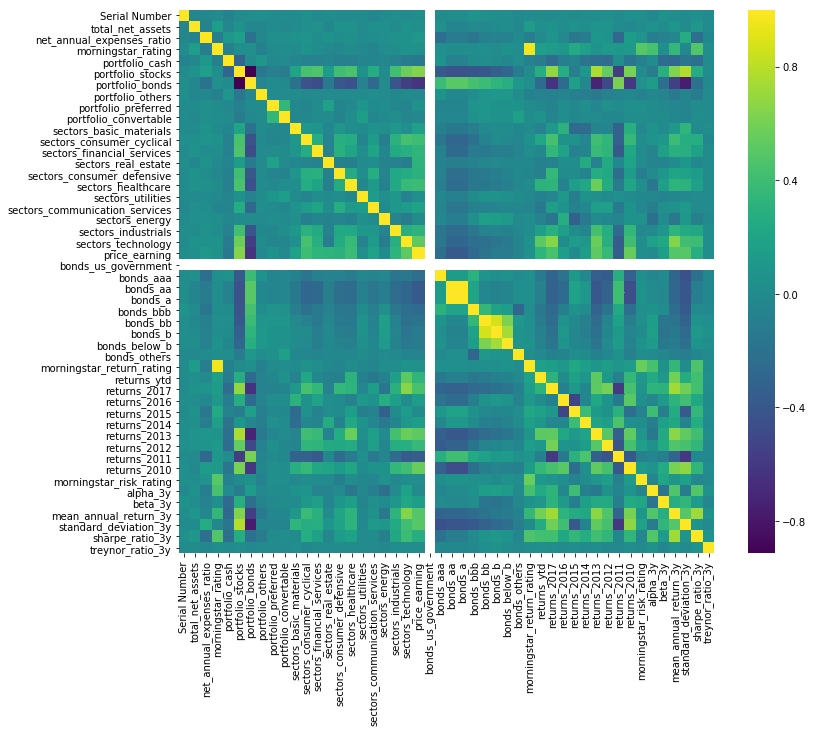

In [321]:
# Plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),cmap='viridis')

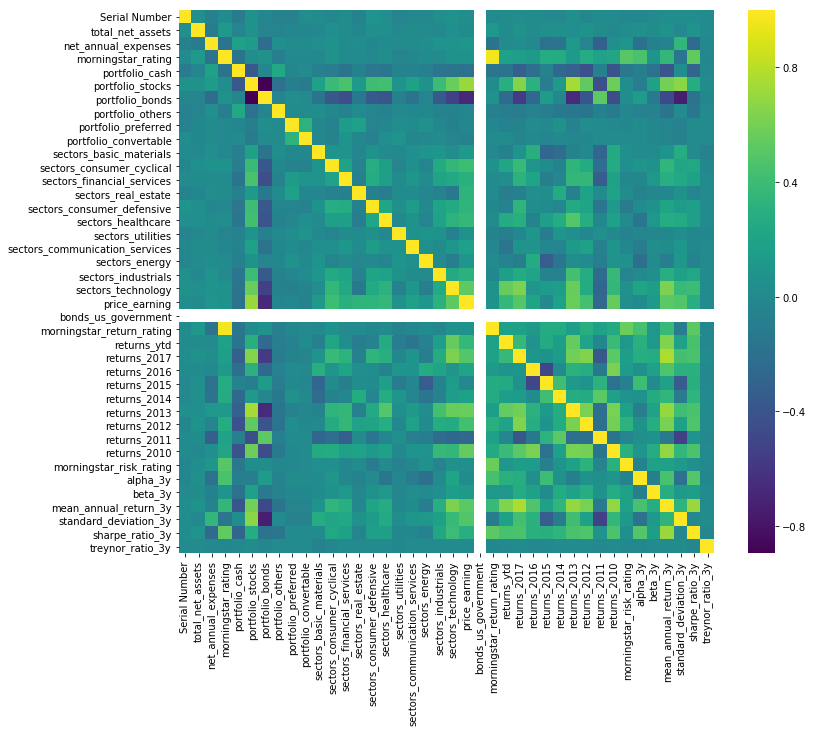

In [322]:
plt.figure(figsize=(12,10))
sns.heatmap(test.corr(),cmap='viridis')

So info from the train and test dataset

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17773 entries, 0 to 17772
Data columns (total 56 columns):
Serial Number                     17773 non-null int64
fund_symbol                       17773 non-null object
fund_name                         17773 non-null object
category                          17773 non-null object
fund_family                       17773 non-null object
investment                        16783 non-null object
size                              16783 non-null object
total_net_assets                  17773 non-null int64
currency                          17773 non-null object
net_annual_expenses_ratio         17761 non-null float64
morningstar_rating                17773 non-null int64
inception_date                    17773 non-null object
portfolio_cash                    17768 non-null float64
portfolio_stocks                  17768 non-null float64
portfolio_bonds                   17768 non-null float64
portfolio_others                  17768 non-null f

In [324]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 48 columns):
Serial Number                     7621 non-null int64
fund_symbol                       7621 non-null object
fund_name                         7621 non-null object
category                          7621 non-null object
fund_family                       7621 non-null object
investment                        7061 non-null object
size                              7061 non-null object
total_net_assets                  7621 non-null int64
currency                          7621 non-null object
net_annual_expenses               7617 non-null float64
morningstar_rating                7621 non-null int64
inception_date                    7621 non-null object
portfolio_cash                    7618 non-null float64
portfolio_stocks                  7618 non-null float64
portfolio_bonds                   7618 non-null float64
portfolio_others                  7618 non-null float64
portfolio_p

### So lets do some recap!!!

## Train Data
* 17773 Datapoints with respective to each bonds
* Most have null values so i think some eda must be done and filling Nan's

## Test Data
* 7621 Data point, with nul values

Lets have a look at some features and what they mean

**Basis Point Spread (Value of bonds_aaa, bonds_aa…..** Variable signifies the bps for the aaa shares, aa shares and so on for the same fund): The basis point is commonly used for calculating changes in interest rates, equity indices, and the yield of a fixed-income security. It is common for bonds and loans to be quoted in basis point terms.

**Net Expense Ratio ( Value of net_annual_expenses_ratio Variable): **The expense ratio measures the per unit cost of managing a fund. It is calculated by dividing the fund’s total expenses by its assets under management.


**Portfolio Cash Level ( portfolio_cash variable): **Every mutual fund scheme comes with a mandate to invest in certain type of securities. And at all times, as well. But every mutual fund scheme is allowed a tiny part of its portfolio in cash. This is allowed to meet redemptions or any ‘buy’ opportunities that the fund may come across on any day. 

**Portfolio_Bonds,Portfolio_Stocks and Portfolio_others Variable: **The percentage of total holdings held in bonds and in stocks. The sum of the three variables plus portfolio cash, preference and convertibles is 100.

**Convertibles (Portfolio_convertible variable expressed in percentage): **Convertibles are securities, usually bonds or preferred shares, that can be converted into common stock.

**Preferred Stock (Portfolio_preferred variable expressed in percentage): **A preferred stock is a class of ownership in a corporation that has a higher claim on its assets and earnings than common stock. 

**Sectors variables (sectors_basic_materials,sectors_financial_services…..):** The percentage of investable assets spread. It defines the percentage of asset investment on various sectors. The sum of sector variables in 100.

**Year To Date Returns (returns_ytd Variable expressed in percentage): **Year to date (YTD) refers to the period beginning the first day of the current calendar year or fiscal year up to the current date. YTD information is useful for analyzing business trends or comparing performance data, and the acronym often modifies concepts such as investment returns, earnings and net pay. 
Read more: Year To Date (YTD)

**Annualized return of a year (basis) (returns_2010,returns_2011….): **‘Return’ is the yield that an investment generates over a period of time. It is the percentage increase or decrease in the value of the investment in that period. Returns on mutual funds are expressed in 2 different ways, viz, absolute and annualized. The most popular one being the annualized return or CAGR (Compounded Annual Growth Rate). 

**Alpha risk parameter for final 3 year assessment (alpha_3y variable):** Alpha is a measure of an investment’s performance on a risk-adjusted basis. It takes the volatility (price risk) of a security or fund portfolio and compares its risk-adjusted performance to a benchmark index.


**Beta risks parameter for final 3 year assessment (beta_3y variable): **
Beta, also known as the “beta coefficient,” is a measure of the volatility, or systematic risk, of a security or a portfolio in comparison to the market as a whole. Beta is calculated using regression analysis, and you can think of it as the tendency of an investment’s return to respond to movements in the market.

**3 year mean annual return (mean_annual_return_3y variable):** The average of individual percentage returns of last three years

**Standard Deviation (standard_deviation_3y Variable):** Standard deviation (SD) 
measures the volatility the fund’s returns in relation to its average. 

**Sharpe Ratio (sharpe_ratio_3y Variable):** The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Subtracting the risk-free rate from the mean return, the performance associated with risk-taking activities can be isolated.

**Treynor Ratio (treynor_ratio_3y Variable):** The Treynor ratio, also known as the reward-to-volatility ratio, is a metric for determining how much excess return was generated for each unit of risk taken on by a portfolio.


Most the variables seems important, basic feature engineering is needed bu nevertheless, we can go ahead with these

### By visualizing the heatmap, there seems to be a pattern!!
* **bonds_us_government** seems to have a single value or zero maybe
* There is quite a correlation between the returns 2010 to 2017 also with the other variables such as the risk parameters.
* **bonds_aaa** seems to be left behind as compared with the correlation between other basis points given
* **bps** seems to be nicely correlated with the portfolio variables
* Also as compared to the train dataset the the lower bonds(bps) values are emitted in test data!! But the question is why are they given!!!



In [325]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Serial Number,17773,NaN,NaN,NaN,8887,5130.77,1,4444,8887,13330,17773
fund_symbol,17773,17773,GCCIX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fund_name,17773,17772,Fidelity Advisor Latin America C,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,17773,108,Large Growth,967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fund_family,17773,587,Fidelity Investments,1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investment,16783,3,Blend,7882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,16783,3,Large,10284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_net_assets,17773,NaN,NaN,NaN,2.4372e+09,1.01497e+10,5000,6.753e+07,3.3256e+08,1.38e+09,1.88e+11
currency,17773,1,USD,17773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
net_annual_expenses_ratio,17761,NaN,NaN,NaN,1.02254,0.626989,0,0.62,0.96,1.37,19.1


**fund_name** consists of a single unique value, must be an *outlier!!* lets check it out


In [329]:
train[train.fund_name=='Fidelity Advisor Latin America C']['bonds_aaa']

6959    0.0
6994    0.0
Name: bonds_aaa, dtype: float64

Renaming the *net_annual_expenses_ratio* from train data to make similar as test data *net_annual_expenses*, as both holds same type of values

In [331]:
train.rename(columns={'net_annual_expenses_ratio':'net_annual_expenses'},inplace=True)

In [332]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Serial Number,7621,NaN,NaN,NaN,3811,2200.14,1,1906,3811,5716,7621
fund_symbol,7621,7621,TSMOX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fund_name,7621,7621,ProFunds Small Cap Inv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,7621,110,Large Blend,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fund_family,7621,312,American Funds,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investment,7061,3,Blend,3535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,7061,3,Large,4293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_net_assets,7621,NaN,NaN,NaN,4.99554e+09,2.70802e+10,2000,6.434e+07,3.8385e+08,1.57e+09,6.99e+11
currency,7621,1,USD,7621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
net_annual_expenses,7617,NaN,NaN,NaN,0.973303,0.645056,0,0.51,0.93,1.35,7.84


Also, 

**currency** holds same value as in 'USD' for both train and test data, can be dropped!!

In [333]:
train.columns

Index(['Serial Number', 'fund_symbol', 'fund_name', 'category', 'fund_family',
       'investment', 'size', 'total_net_assets', 'currency',
       'net_annual_expenses', 'morningstar_rating', 'inception_date',
       'portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning',
       'bonds_us_government', 'bonds_aaa', 'bonds_aa', 'bonds_a', 'bonds_bbb',
       'bonds_bb', 'bonds_b', 'bonds_below_b', 'bonds_others',
       'morningstar_return_rating', 'returns_ytd', 'returns_2017',
       'returns_2016', 'returns_2015', 'returns_2014', 'returns_2013',
       'returns_2012', 'returns_2011', '

**Returns**

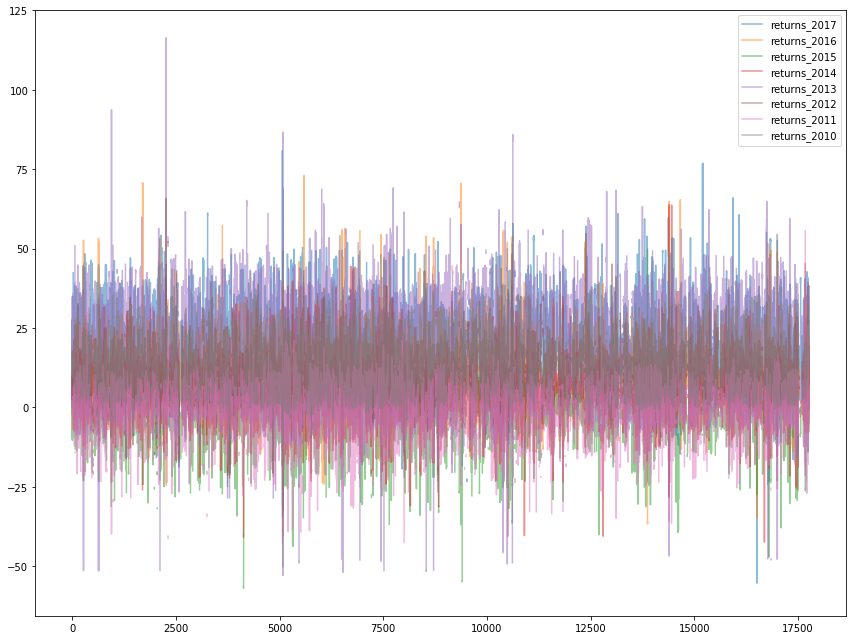

In [358]:
returns=['returns_2017',
       'returns_2016', 'returns_2015', 'returns_2014', 'returns_2013',
       'returns_2012', 'returns_2011', 'returns_2010']

plt.figure(figsize=(12,9))
for ret in returns:
    train[ret].plot(kind='line',legend=True,alpha=0.5)
plt.tight_layout()

**Target Variable**

**bonds_aaa**

Text(0,0.5,'bonds_aaa')

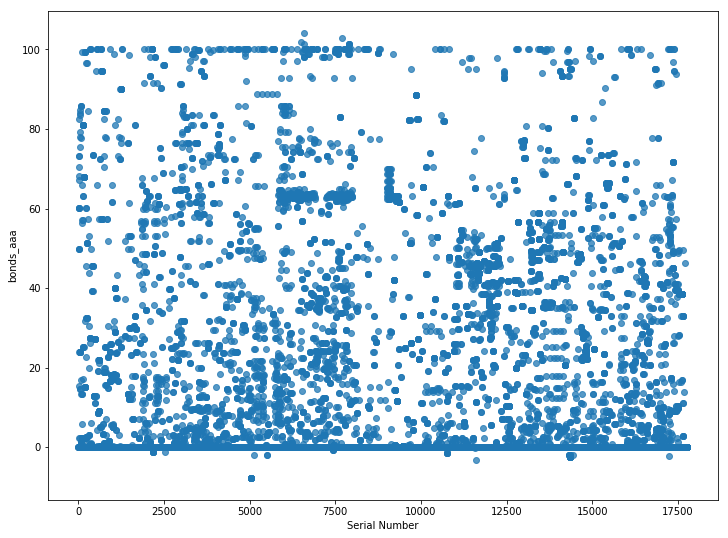

In [367]:
plt.figure(figsize=(12,9))
plt.scatter(train['Serial Number'],train.bonds_aaa,alpha=0.75)
plt.xlabel('Serial Number')
plt.ylabel('bonds_aaa')

In [368]:
train.bonds_aaa.value_counts(normalize=True)

0.00      0.652690
100.00    0.009230
38.63     0.002082
45.55     0.001520
63.18     0.001238
23.88     0.001238
63.10     0.001013
34.52     0.001013
2.37      0.001013
4.60      0.000957
12.85     0.000957
7.00      0.000957
48.37     0.000900
5.67      0.000900
73.34     0.000844
74.24     0.000844
98.90     0.000844
35.19     0.000844
2.35      0.000844
61.47     0.000788
35.57     0.000788
27.41     0.000732
47.62     0.000732
33.62     0.000732
24.77     0.000675
9.07      0.000675
40.57     0.000675
41.21     0.000675
9.03      0.000675
56.60     0.000675
            ...   
38.49     0.000056
57.98     0.000056
7.90      0.000056
71.79     0.000056
51.59     0.000056
1.68      0.000056
27.00     0.000056
20.85     0.000056
44.24     0.000056
60.44     0.000056
18.79     0.000056
10.80     0.000056
22.79     0.000056
5.95      0.000056
98.59     0.000056
1.16      0.000056
55.81     0.000056
15.59     0.000056
41.91     0.000056
63.85     0.000056
39.04     0.000056
58.15     0.

**WOah!!! ok so we found that 65% of the target variable is zero.**

So lets try one thing before jumping

In [370]:
sub=pd.DataFrame({'serial number':test['Serial Number'],'bonds_aaa':[0]*len(test)})
sub.to_csv('basic.csv',index=False)

## What!!!

### 64.XXX% Accuracy out of the blue 

This seems odd!!
Thats why the pattern on leaderboard.

And after all the fuss about the clusters and how to make the submission. **WOW!!**

# Data Preprocessing

In [371]:
#Dropping some featurs as they are  not required or will not help in regression task
df_train=train.copy()
df_train.drop(['Serial Number','fund_symbol','fund_name','currency','inception_date','bonds_aa', 'bonds_a', 'bonds_bbb',
       'bonds_bb', 'bonds_b', 'bonds_below_b', 'bonds_others','bonds_us_government'],axis=1,inplace=True)

* Dropped funds details as they are all unique
* Currency as it has only one value
* Other bps indicators except bonds_aaa(target)

Label Encoding for **Category** and **Fund Family** as 

* Train and test has 107 common categories
* Train and test has 138 common fund family

In [373]:
l=list(set(train.category.values))
l.extend(list(set(test.category.values)))

In [374]:
len(np.intersect1d(train.fund_family,test.fund_family))

138

In [375]:
f=list(set(train.fund_family.values))
f.extend(list(set(test.fund_family.values)))

Transforming

In [376]:
from sklearn.preprocessing import LabelEncoder,RobustScaler
lb1=LabelEncoder()
lb1.fit(np.asarray(l))
df_train['category']=lb1.transform(df_train['category'])
lb2=LabelEncoder()
lb2.fit(np.asarray(f))
df_train['fund_family']=lb2.transform(df_train['fund_family'])

One Hot Encoding for the remaining Mutual funds variables 

**Investment and Size**

In [377]:
df_train=pd.get_dummies(df_train,drop_first=True)

In [378]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17773 entries, 0 to 17772
Data columns (total 45 columns):
category                          17773 non-null int64
fund_family                       17773 non-null int64
total_net_assets                  17773 non-null int64
net_annual_expenses               17761 non-null float64
morningstar_rating                17773 non-null int64
portfolio_cash                    17768 non-null float64
portfolio_stocks                  17768 non-null float64
portfolio_bonds                   17768 non-null float64
portfolio_others                  17768 non-null float64
portfolio_preferred               17768 non-null float64
portfolio_convertable             17768 non-null float64
sectors_basic_materials           17768 non-null float64
sectors_consumer_cyclical         17768 non-null float64
sectors_financial_services        17768 non-null float64
sectors_real_estate               17768 non-null float64
sectors_consumer_defensive        17768 non-

Filling out the **NaN's**

In [379]:
#Filling out the NaN's with Zero for basic
df_train.net_annual_expenses.fillna(value=df_train.net_annual_expenses.mean(),inplace=True)
df_train.price_earning.fillna(value=df_train.price_earning.mean(),inplace=True)
df_train.bonds_aaa.fillna(value=0,inplace=True)
df_train.alpha_3y.fillna(value=0,inplace=True)
#Beta value taken as 1, as A beta of 1.0 indicates that the investment’s price will move in lock-step with the market. 
#A beta of less than 1.0 indicates that the investment will be less volatile than the market. 
#Correspondingly, a beta of more than 1.0 indicates that the investment’s price will be more volatile than the market.
df_train.beta_3y.fillna(value=1,inplace=True)

df_train.mean_annual_return_3y.fillna(value=0,inplace=True)
df_train.standard_deviation_3y.fillna(value=0,inplace=True)
df_train.sharpe_ratio_3y.fillna(value=0,inplace=True)
df_train.treynor_ratio_3y.fillna(value=0,inplace=True)

for i in df_train.columns:
    if i.startswith('portfolio'):
        df_train[i].fillna(value=0,inplace=True)
    elif i.startswith('sectors'):
        df_train[i].fillna(value=0,inplace=True)
    elif i.startswith('returns'):
        df_train[i].fillna(value=0,inplace=True)

In [380]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17773 entries, 0 to 17772
Data columns (total 45 columns):
category                          17773 non-null int64
fund_family                       17773 non-null int64
total_net_assets                  17773 non-null int64
net_annual_expenses               17773 non-null float64
morningstar_rating                17773 non-null int64
portfolio_cash                    17773 non-null float64
portfolio_stocks                  17773 non-null float64
portfolio_bonds                   17773 non-null float64
portfolio_others                  17773 non-null float64
portfolio_preferred               17773 non-null float64
portfolio_convertable             17773 non-null float64
sectors_basic_materials           17773 non-null float64
sectors_consumer_cyclical         17773 non-null float64
sectors_financial_services        17773 non-null float64
sectors_real_estate               17773 non-null float64
sectors_consumer_defensive        17773 non-

Great, no null values now

Some more heatmaps

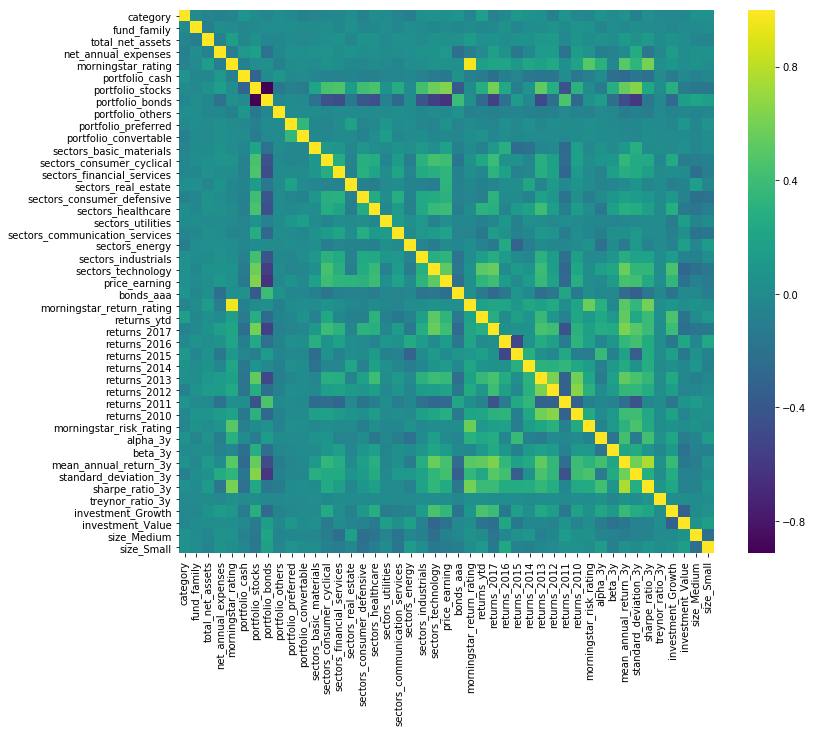

In [382]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),cmap='viridis')

Lets see if they meant truth about the data!!
The Basis point spread range is divided into 3 clusters which are: 
* 1) Less than 50 
* 2) 50 to less than 100 
* 3) 100 

### Elbow Curve

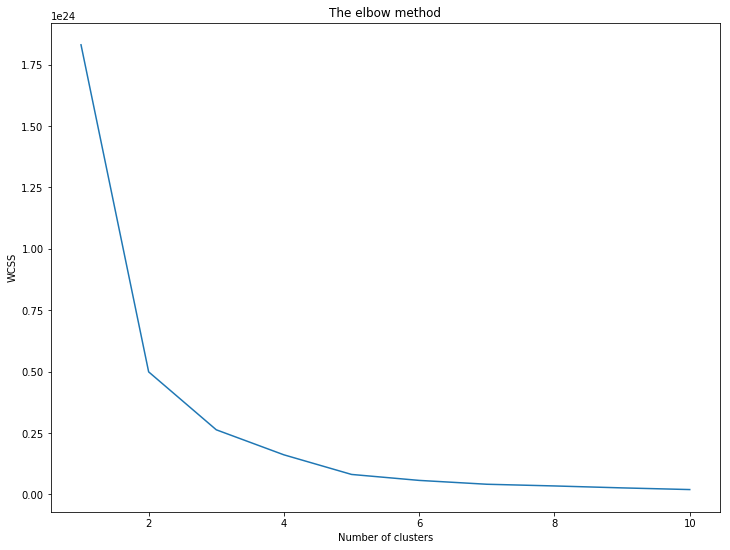

In [384]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_train.drop('bonds_aaa',axis=1))
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(12,9))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

So there could be 2 ways.

* Make clusters on basis on Kmeans clustering
* Make clusters based on the way they said

In [27]:
#Applying kmeans to the dataset / Creating the kmeans classifier
# kmeans = KMeans(n_clusters = 3, init = 'k-means++',  random_state = 0)
# y_kmeans = kmeans.fit(df_train.drop('bonds_aaa',axis=1)).labels_

In [28]:
# def clusterto(df):
#     if df<50:
#         return 0
#     elif df>=50 and df<100:
#         return 1
#     elif df>=100:
#         return 2

In [29]:
# df_train['cluster']=df_train.bonds_aaa.apply(clusterto)

In [30]:
# df_train.drop('clusters',axis=1,inplace=True)

In [31]:
# X=df_train.drop(['bonds_aaa','cluster'],axis=1)
# y=df_train[['bonds_aaa','cluster']]

# X=df_train.drop(['bonds_aaa'],axis=1)
# y=df_train['bonds_aaa']

In [32]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor()
# rf.fit(X_train,y_train)

# from sklearn.linear_model import LinearRegression
# ls=LinearRegression()
# ls.fit(X_train,y_train)


In [257]:
# pr=rf.predict(X_test)
#from sklearn.metrics import mean_squared_error,accuracy_score,f1_score
# print(f1_score(y_test,pr,average='weighted'))
# print(np.sqrt(mean_squared_error(y_test,pr)))
# print(rf.score(X_test,y_test))

# pr=ls.predict(X_test)
# from sklearn.metrics import mean_squared_error,accuracy_score
# print(np.sqrt(mean_squared_error(y_test,pr)))
# print(ls.score(X_test,y_test))

I would say waste of time!! it gave a descent accuracy but the accuracy metric applied in the competion is an enigma!!

So lets clear out the test Dataset as we did for the train data

In [386]:
df_test=test.copy()
df_test.drop(['Serial Number','fund_symbol','fund_name','currency','inception_date','bonds_us_government'],axis=1,inplace=True)
df_test['category']=lb1.transform(df_test.category)
df_test['fund_family']=lb2.transform(df_test['fund_family'])

In [387]:
df_test=pd.get_dummies(df_test,drop_first=True)
df_test.head()

,category,fund_family,total_net_assets,net_annual_expenses,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,...,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,investment_Growth,investment_Value,size_Medium,size_Small
0,41,537,18170000,1.00,3,1.47,98.53,0.00,0.00,0.00,...,-2.13,0.99,0.73,10.31,0.78,7.92,0,0,0,0
1,81,537,257730000,1.30,3,3.56,96.44,0.00,0.00,0.00,...,-1.39,0.95,0.76,11.49,0.73,8.49,1,0,1,0
2,2,680,227230000,0.00,0,9.62,58.30,25.44,3.20,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,39,531,19650000,1.53,1,0.57,0.00,99.23,0.00,0.00,...,-1.35,0.98,0.01,2.74,-0.23,-0.68,0,0,1,0
4,41,680,312040000,0.00,0,2.29,91.37,5.43,0.91,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [388]:
df_test.net_annual_expenses.fillna(value=df_test.net_annual_expenses.mean(),inplace=True)
df_test.price_earning.fillna(value=df_test.price_earning.mean(),inplace=True)
# df_test.bonds_aaa.fillna(value=df_test.bonds_aaa.mean(),inplace=True)
df_test.alpha_3y.fillna(value=0,inplace=True)
df_test.beta_3y.fillna(value=1,inplace=True)

df_test.mean_annual_return_3y.fillna(value=0,inplace=True)
df_test.standard_deviation_3y.fillna(value=0,inplace=True)
df_test.sharpe_ratio_3y.fillna(value=0,inplace=True)
df_test.treynor_ratio_3y.fillna(value=0,inplace=True)

for i in df_test.columns:
    if i.startswith('portfolio'):
        df_test[i].fillna(value=0,inplace=True)
    elif i.startswith('sectors'):
        df_test[i].fillna(value=0,inplace=True)
    elif i.startswith('returns'):
        df_test[i].fillna(value=0,inplace=True)

In [389]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 44 columns):
category                          7621 non-null int64
fund_family                       7621 non-null int64
total_net_assets                  7621 non-null int64
net_annual_expenses               7621 non-null float64
morningstar_rating                7621 non-null int64
portfolio_cash                    7621 non-null float64
portfolio_stocks                  7621 non-null float64
portfolio_bonds                   7621 non-null float64
portfolio_others                  7621 non-null float64
portfolio_preferred               7621 non-null float64
portfolio_convertable             7621 non-null float64
sectors_basic_materials           7621 non-null float64
sectors_consumer_cyclical         7621 non-null float64
sectors_financial_services        7621 non-null float64
sectors_real_estate               7621 non-null float64
sectors_consumer_defensive        7621 non-null float64
secto

Great no null values

In [391]:
X=df_train.drop('bonds_aaa',axis=1)
y=df_train.bonds_aaa

In [392]:
X.shape

(17773, 44)

In [393]:
## Scaling if neccesary in future
r=RobustScaler()
Xsc=r.fit_transform(X)
Xtestsc=r.transform(df_test)

# Start Predicting

In [48]:
#Tried clusters approach

# df=pd.DataFrame(columns=['serial number','bonds_aaa'])
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor(n_estimators=100)
# X=df_train[df_train.clusters==0].drop('bonds_aaa',axis=1)
# y=df_train[df_train.clusters==0].bonds_aaa
# rf.fit(X,y)
# pr=rf.predict(df_test[df_test.clusters==0].drop('Serial Number',axis=1))
# df=df.append(pd.DataFrame({'serial number':df_test[df_test.clusters==0]['Serial Number'],'bonds_aaa':pr}))

In [49]:
# X=df_train[df_train.clusters==1].drop('bonds_aaa',axis=1)
# y=df_train[df_train.clusters==1].bonds_aaa
# rf.fit(X,y)
# pr=rf.predict(df_test[df_test.clusters==1].drop('Serial Number',axis=1))
# df=df.append(pd.DataFrame({'serial number':df_test[df_test.clusters==1]['Serial Number'],'bonds_aaa':pr}))

In [50]:
# X=df_train[df_train.clusters==2].drop('bonds_aaa',axis=1)
# y=df_train[df_train.clusters==2].bonds_aaa
# rf.fit(X,y)
# pr=rf.predict(df_test[df_test.clusters==2].drop('Serial Number',axis=1))
# df=df.append(pd.DataFrame({'serial number':df_test[df_test.clusters==2]['Serial Number'],'bonds_aaa':pr}))

In [51]:
# df.bonds_aaa.plot()

In [52]:
# df.to_csv('s2.csv',index=False)

Tried Clusters approach but failed miserably, dont know now what they want!! :D

Regression methods tried

* Linear models
* Ensemble approach
* Decision Trees(Killed it i think)

Feature selection tried by Decision tree feature importances and Kfold

In [394]:
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor()
# rf.fit(X,y)
# pr=rf.predict(df_test)

# from sklearn.linear_model import Lasso
# lr=Lasso(alpha=0.01)
# lr.fit(X,y)
# pr=lr.predict(df_test)



# from xgboost import XGBRegressor
# rf=DecisionTreeRegressor()
# rf.fit(X,y)
# pr=rf.predict(df_test)
from sklearn.model_selection import KFold # import KFold
# kf = KFold(n_splits=4,random_state=101) # Define the split - into 2 folds 
# kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
# err=[]
# pred=[]
# # pred=np.asarray(pred)
# for train_index, test_index in kf.split(X):
# #     print(“TRAIN:”, train_index, “TEST:”, test_index)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     rf.fit(X_train,y_train)
#     pr=rf.predict(X_test)
#     err.append(np.sqrt(mean_squared_error(y_test,pr)))
#     pre=rf.predict(df_test)
#     pred.append(pre)
    
    
# from sklearn.model_selection import cross_val_predict
# y_pred=cross_val_predict(rf,X,y,cv=4)
    
    
# KFold(n_splits=2, random_state=None, shuffle=False)

from sklearn.tree import DecisionTreeRegressor
rf=DecisionTreeRegressor(max_features=40,max_depth=1000,min_samples_split=3)
# rf=DecisionTreeRegressor()
rf.fit(X,y)
pr=rf.predict(df_test)

In [395]:
df_test.columns.shape

(44,)

**Feature Importance**

In [396]:
col=pd.DataFrame({'imp':rf.feature_importances_,'cols':df_test.columns}).sort_values(by='imp',ascending=False)[:40]
main_cols=col.cols

In [397]:
X1=X[main_cols]
df_test1=df_test[main_cols]

In [398]:
rf1=DecisionTreeRegressor(max_features=30,max_depth=1000,min_samples_split=3)
rf1.fit(X1,y)
pr=rf1.predict(df_test1)

In [399]:
sub=pd.DataFrame({'serial number':test['Serial Number'], 'bonds_aaa':pr})
sub.head()

,serial number,bonds_aaa
0,1,0.0
1,2,0.0
2,3,20.7
3,4,41.8
4,5,0.0


### After so much questions in the discussion forum at last they gave some thought to it and later given an example!!

**Submission file explanation: **
Let’s say we need to predict the value of variable x against serial numbers which are unique identifiers. Let’s take an example of 6 total data points which are sorted into 3 clusters which have 2 values each. 

Cluster 1: value from 5-6 

Cluster 2: value from 6-7 

Cluster 3: value from 7-8

Serial Number X 

3 5.3 

5 5.9 

1 6.2 

4 6.6 

2 7.1 

6 7.4


The above is how the predicted and sorted (as per clusters) submission file is expected to be like above. Please also note the mapping stays instead of the position of the value in the sorted list.

Why make things so ***COMPLEX***

So that means, just sort them, why the confusion of the clusters!!!

In [400]:
#sorting
sub.sort_values(by=['bonds_aaa','serial number'],inplace=True)

In [401]:
sub.bonds_aaa.value_counts(normalize=True)

 0.000      0.657132
 100.000    0.010891
 40.670     0.006167
 4.940      0.004986
 55.875     0.004724
 50.900     0.004068
 38.430     0.003018
 43.820     0.003018
 62.210     0.003018
 60.440     0.002756
 13.880     0.002624
 44.510     0.002624
 17.420     0.002624
 43.500     0.002493
 17.020     0.002493
 30.420     0.002362
 41.730     0.002231
 39.490     0.002099
-2.190      0.002099
 35.580     0.002099
 49.020     0.002099
 23.170     0.001968
 10.530     0.001968
 33.670     0.001837
 2.370      0.001837
 29.720     0.001837
 36.660     0.001706
 9.050      0.001575
 71.630     0.001575
 30.030     0.001575
              ...   
 2.700      0.000131
 14.700     0.000131
 67.290     0.000131
 9.270      0.000131
 0.820      0.000131
 16.470     0.000131
 19.990     0.000131
 14.570     0.000131
 0.330      0.000131
 1.860      0.000131
 2.300      0.000131
 25.170     0.000131
 51.590     0.000131
 76.380     0.000131
 48.780     0.000131
 2.310      0.000131
 20.895     0

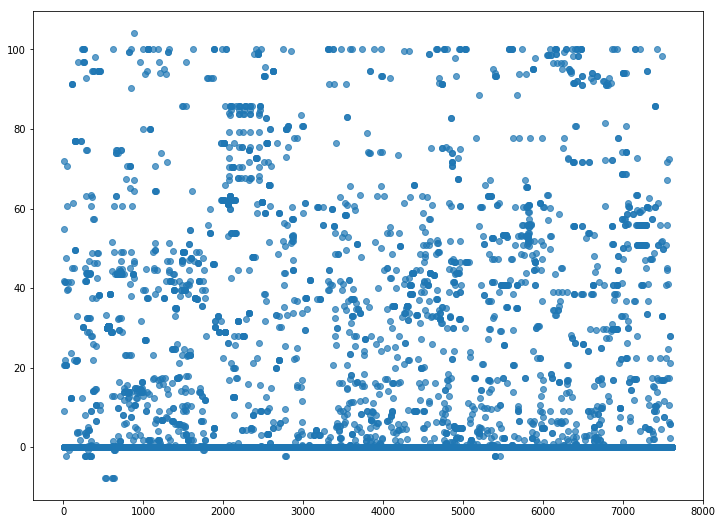

In [405]:
plt.figure(figsize=(12,9))
plt.scatter(sub['serial number'],sub.bonds_aaa,alpha=0.7)

This Seems good enough!!

In [313]:
sub.to_csv('basic_decisiontree1.csv',index=False)

Lets look at submission file!!!

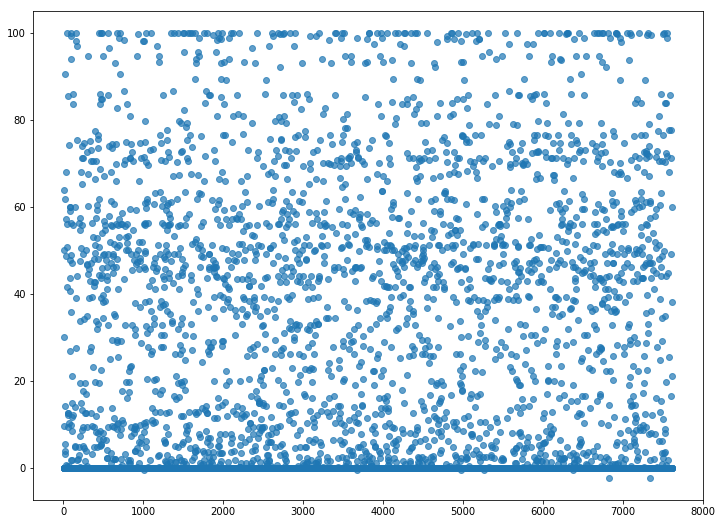

In [407]:
s=pd.read_csv('Yes_Bank_sample_submission.csv')
plt.figure(figsize=(12,9))
plt.scatter(s['serial number'],s.bonds_aaa,alpha=0.7)

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


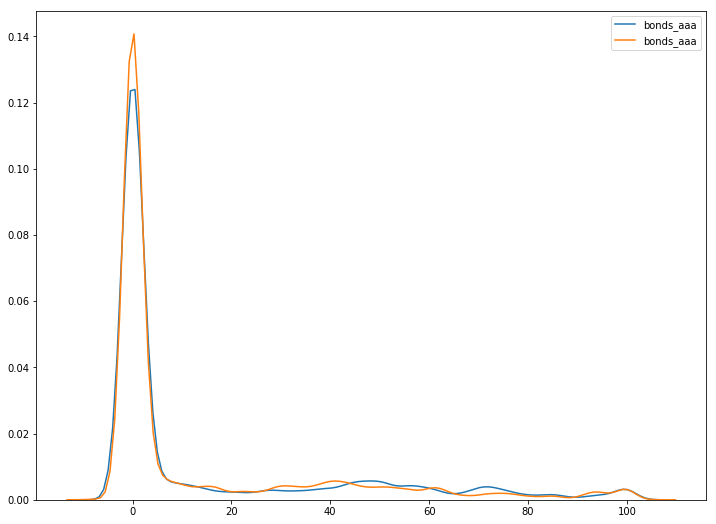

In [408]:
plt.figure(figsize=(12,9))
sns.kdeplot(s.bonds_aaa)
sns.kdeplot(sub.bonds_aaa)

# Conclusion

* Dataset must be througly washed over
* Can be looked in **PCA Decomposition Analysis**
* Great Learning for Mutual Funds Beneficiaries